Breakdown of the Notebook


1.   Loading Libraries for Data Preprocessing and EDA
2.   Loading Dataset
3.   Data Preprocessing
4.   Exploratory Data Analysis
5.   Model Exploration and Model Selection
*   Goal 1 and 3: Understanding important factors impacting Rating of a restaurant and Implementation of Selected Models(Naive, Linear, Decision Tree and Extra Tree Regression). Using these model to predict on untrained data x_test and measuring performance
*   Goal 2: Identify and cluster restaurants based on common attributes
*   Goal 4: Building Recommendation system to suggest restaurant based on customer preference(This is in DM_Group39_Recommendation_System_Code.ipynb file









# Loading Libraries for Data Preprocessing and EDA

In [299]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
import sys
import csv
csv.field_size_limit(sys.maxsize)
from wordcloud import WordCloud

# Loading Dataset

In [300]:
df= pd.read_csv('zomato.csv', engine="python", error_bad_lines=False)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [301]:
a,b=df.shape  # Since shape return tuple thus storing value in a and b 
print('Data Point= ',a*b)
df.shape
#We have 51K rows of restaurant data and 17 columns.

Data Point=  879189


(51717, 17)

# Data Preprocessing

In [302]:
# Counting NaN in each Columns
# We can also df.info()
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [303]:
# .info helps us check NaN values and data type of each column
df.info()
#rate column which will be the outcome column for models has 43K filled rows out of 51K. 
#We won't be imputing values for this column. Any manipulation of the outcome column will add bias in the predictions
#So maximum rows we can use after data cleaning will be around 43K.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [304]:
# Dropping Url and Phone no as they are not useful for this project. 
# Dish liked contains a lot of missing values ~50% so won't be used for modeling. Can be used at EDA level potentially
df.drop(['url','phone','dish_liked'], axis =1, inplace=True)

In [305]:
# Dropping row duplicates.
print('Number of Dublicate values in Data Frame = ',df.duplicated().sum())
df.drop_duplicates(inplace=True)

Number of Dublicate values in Data Frame =  43


In [306]:
# Remove the NaN values from the dataset. 
#Doing this as most NAs were part of rows which had outcome variable rate as NA. So taking this approach
df.dropna(how='any',inplace=True)

In [307]:
# clean Rating column
#Rating is formated as 4.1/5 etc so to make the column useable we need to remove '/5' from Rates
#Also there were few restaurants that had just opened so the rating column for these was 'NEW' and had to be dropped.
#We will try predicting ratings for these 'NEW' restaurants later
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [308]:
# clean Rating column
df_new=df[df.rate=='NEW']
df_new.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
72,"Opposite ICICi Bank, Hanuman Nagar, Banashanka...",Spicy Tandoor,No,No,NEW,0,Banashankari,Quick Bites,North Indian,150,"[('Rated 4.0', 'RATED\n cost for chicken roll...",[],Delivery,Banashankari
75,"39, S B M Colony, Near-Sita Circle, 1st Stage,...",Om Sri Vinayaka Chats,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Street Food, Fast Food",500,[],[],Delivery,Banashankari
110,"594, 24 The Cross BSK, Opposte Oriental Bank, ...",Hari Super Sandwich,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Sandwich, Pizza, Beverages",200,"[('Rated 1.0', 'RATED\n I have been here many...",[],Delivery,Banashankari
130,"28, 4th Cross Road, Dwaraka Nagar, Banashankar...",Roll Magic Fast Food,No,No,NEW,0,Banashankari,"Takeaway, Delivery","Biryani, Rolls, Chinese",200,[],[],Delivery,Banashankari
131,"3/16, 22 Main Road, Magenta Block, PES College...",Foodlieious Multi Cuisine,No,No,NEW,0,Banashankari,Quick Bites,North Indian,100,[],[],Delivery,Banashankari


In [309]:
df_new.shape
#So from 43K Non NA rate values we will be saving 2K rows separately for future analysis and remaining 41K will be used

(2197, 14)

In [310]:
# clean Rating column
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [311]:
df.shape
#41K rows and 14 columns

(41237, 14)

In [312]:
# Cleaning individual columns. This updated table will be used for Data Exploration Milestone. 41K rows in all columns without NAs

# Cost for 2 people is in object data type we need to convert it to float
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str)
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(lambda x: x.replace(',','.'))
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41237 entries, 0 to 41236
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      41237 non-null  object 
 1   name                         41237 non-null  object 
 2   online_order                 41237 non-null  object 
 3   book_table                   41237 non-null  object 
 4   rate                         41237 non-null  float64
 5   votes                        41237 non-null  int64  
 6   location                     41237 non-null  object 
 7   rest_type                    41237 non-null  object 
 8   cuisines                     41237 non-null  object 
 9   approx_cost(for two people)  41237 non-null  float64
 10  reviews_list                 41237 non-null  object 
 11  menu_item                    41237 non-null  object 
 12  listed_in(type)              41237 non-null  object 
 13  listed_in(city) 

In [313]:
#Checking unique restaurant brands
len(df.name.unique())

6602

In [314]:
# Checking no of resturants listed on Zomato
# There are 9k resturants listed on Zomato in Bangalore city. 6602 are unique restaurant brands. 
# Multiple entries are due to restaurant chains across the bangalore city.
#These ~9K restautants in Bangalore have multiple rows. 

# k = df.name.unique()
# len(k)

df.name.value_counts()

Cafe Coffee Day                   86
Onesta                            85
Empire Restaurant                 69
Kanti Sweets                      68
Five Star Chicken                 68
                                  ..
Daafoodies                         1
I Siri Restaurant And Caterers     1
The Foodware Veg                   1
Hotel Thalassery                   1
SeeYa Restaurant                   1
Name: name, Length: 6602, dtype: int64

In [315]:
#Renaming columns
df.columns
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})

# Exploratory Data Analysis

In the EDA section, we have created a temp dataframe at location, name and address level and the respective metric being analyzed. Location, name and address is the unique identifier for any restaurant, so those columns were picked everytime to get data at a restaurant level for each analysis

In [ ]:
#Data Prep for Q1
df_viz=df[['location','name','address']]
df_viz.drop_duplicates(inplace=True)

Question 1: How many restaurants are located in each area within Bangalore?

Insight 1: Whitefield, BTM Layout, and HSR Layout are the top 3 areas with the most restaurants. 

Text(0, 0.5, 'Total no. of Restaurant')

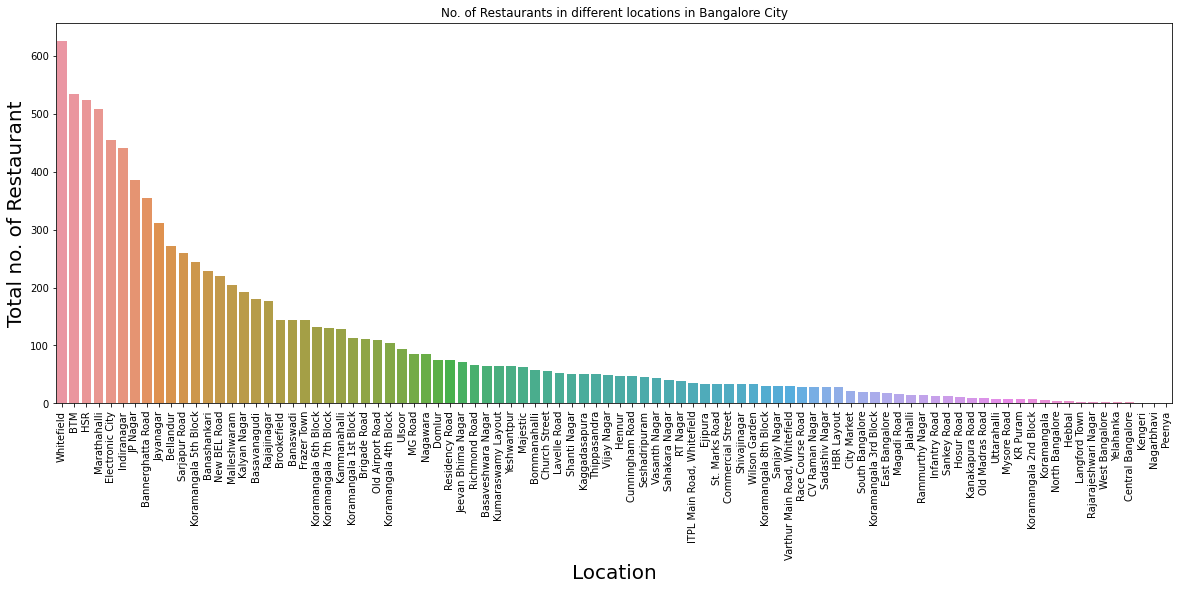

In [ ]:
#Finding number of restaurants in each area in Bangalore. Area is split by Zip code names. 
#So essentially visualizing the number of restaurants in each zipcode
#df.location.value_counts()
plt.figure(figsize=(20,7))
plt.xticks(rotation=90)
p=sns.countplot('location', data=df_viz,order = df_viz['location'].value_counts().index);
p.set_title("No. of Restaurants in different locations in Bangalore City")
p.set_xlabel("Location", fontsize = 20)
p.set_ylabel("Total no. of Restaurant", fontsize = 20)
#We will later explore the trend in Geo Heatmap to understand factors that resulted in the areas having a certain number of restuarant.
#Showing this plot for better explainability

In [ ]:
#Data Prep for Q2
df_viz=df[['location','name','address','rate']]
df_viz.drop_duplicates(inplace=True)

Question 2: How does ratings vary with restaurants?

Insight 2: Most restaurants have an average rating of 3.7 and standard deviation of 0.44

The trend looks like a normal distribution. We can say that:

1) When Rating is between 4.5 to 4.9---> Excellent 

2) When Rating are between 4.0 to 3.4--->Very good 

3) When Rating is between 3.5 to 3.9----> Good 

4) When Rating is between 3.0 to 3.4----> Average 

5) When Rating is between 2.5 to 2.9----> Average 

6) When Rating is below 2.4----> Poor

In [ ]:
# Preprocessing and finding counting the number of restaurants with the same rating to see the distribution
city_names=df_viz.location.value_counts().index
city_val=df_viz.location.value_counts().values
ratings=df_viz.groupby(['rate']).size().reset_index().rename(columns={0:'Rating Count'})
ratings.head()
#We can now visualize the data.

,rate,Rating Count
0,1.8,1
1,2.0,2
2,2.1,6
3,2.2,6
4,2.3,14


Text(0, 0.5, 'Total no. of Restaurant')

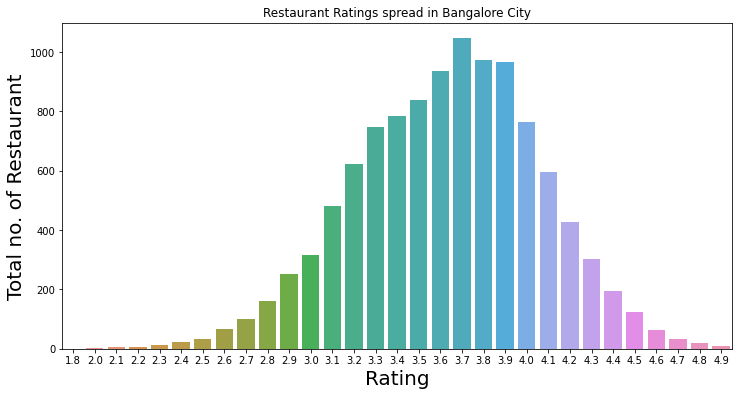

In [ ]:
plt.rcParams['figure.figsize'] = (12, 6)#Rating 
p=sns.barplot(x="rate",y="Rating Count",data=ratings)
p.set_title("Restaurant Ratings spread in Bangalore City")
p.set_xlabel("Rating", fontsize = 20)
p.set_ylabel("Total no. of Restaurant", fontsize = 20)

In [ ]:
#Data Prep for Q3
df_viz=df[['location','name','address','online_order','rate']]
df_viz.drop_duplicates(inplace=True)

Question 3: How many restaurants offer Online ordering option and who offers offline only options

Insight 3: Online ordering is so crucial to restaurant survival especially with the pandemic, 63% of restaurants in Bangalore have Online ordering as an option. Offline option is offered by Larger Restaurants like Hilton Bangalore and Ice Cream Parlors. Restaurants listed in offline ordering can have online option too.


In [ ]:
online_delivery = df_viz['online_order'].value_counts()
#online_delivery

[]

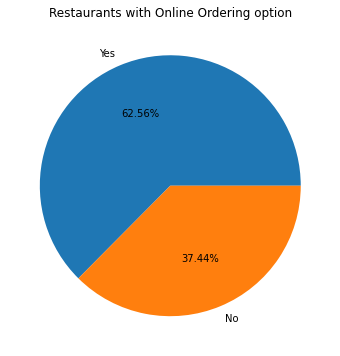

In [ ]:
plt.pie(online_delivery.values, labels= online_delivery.index, autopct='%1.2f%%')
plt.title('Restaurants with Online Ordering option')
plt.plot()  ##63% HAS ONLINE ordering option 

In [ ]:
X=df_viz
highRatYes = X[(X["rate"] >= 4.5) & (X["online_order"] == "Yes")]
ratOnline = highRatYes.shape[0]
b = highRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of Excellent Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating above 4.5")

highRatNo = X[(X["rate"] >= 4.5) & (X["online_order"] == "No")]
ratOffline = highRatNo.shape[0]
b = highRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of Excellent Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating above 4.5")

print("*" * 50)

midRatYes = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "Yes")]
ratOnline = midRatYes.shape[0]
b = midRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of Very Good Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating between 4.0 to 4.4")

midRatNo = X[(X["rate"] >= 4.0) & (X["rate"] <= 4.4) & (X["online_order"] == "No")]
ratOffline = midRatNo.shape[0]
b = midRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of Very Good Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOffline} restaurents take offline order and their rating between 4.0 to 4.4")

print("*" * 50)

lowRatYes = X[(X["rate"] < 4.0) & (X["online_order"] == "Yes")]
ratOnline = lowRatYes.shape[0]
b = lowRatYes.max()
c = b["rate"]
a = b["name"]
print(f"Name of Low Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOnline} restaurents take online order and their rating less 4.0")

lowRatNo = X[(X["rate"] < 4.0) & (X["online_order"] == "No")]
ratOfline = lowRatNo.shape[0]
b = lowRatNo.max()
c = b["rate"]
a = b["name"]
print(f"Name of Low Rated Restaurent: {a} and Rate is: {c}")
print(f"Total {ratOfline} restaurents take offline order and their rating less 4.0")

## Offline option is offered by Larger Restaurants like Hilton Bangalore and Ice Cream Parlors

Name of Excellent Rated Restaurent: eat.fit and Rate is: 4.9
Total 110 restaurents take online order and their rating above 4.5
Name of Excellent Rated Restaurent: Yauatcha and Rate is: 4.9
Total 140 restaurents take offline order and their rating above 4.5
**************************************************
Name of Very Good Rated Restaurent: nu.tree and Rate is: 4.4
Total 1543 restaurents take online order and their rating between 4.0 to 4.4
Name of Very Good Rated Restaurent: re:cess - Hilton Bangalore Embassy GolfLinks and Rate is: 4.4
Total 772 restaurents take offline order and their rating between 4.0 to 4.4
**************************************************
Name of Low Restaurent: iSpice Resto Cafe and Rate is: 3.9
Total 5304 restaurents take online order and their rating less 4.0
Name of Low Rated Restaurent: iFruit Live Ice Creams and Rate is: 3.9
Total 3251 restaurents take offline order and their rating less 4.0


In [ ]:
#Data Prep for Q4
df_viz=df[['location','name','address','book_table','rate']]
df_viz.drop_duplicates(inplace=True)

Question 4: What percentage of restaurants have booking a table option?

Insight 4: Only 10% offer the booking a table option on Zomato, this could be because of pandemic restrictions or restaurants not able to handle online booking. They might be preferring in person bookings only.

In [ ]:
book_table = df_viz['book_table'].value_counts()

No     9793
Yes    1132
Name: book_table, dtype: int64

[]

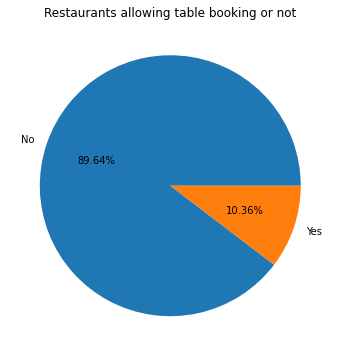

In [ ]:
plt.pie(book_table.values, labels= book_table.index, autopct='%1.2f%%')
plt.title('Restaurants allowing table booking or not')
plt.plot() 

In [ ]:
#Data Prep for Q5
df_viz=df[['location','name','address','votes','rate']]
df_viz.drop_duplicates(inplace=True)

Question 5: Which areas in Bangalore vote the most, and what's the average number of votes for all areas

Insight 5: 

Koramangala 5th Block has the highest number of votes and average votes, shows popularity of restaurants in Kormangala. 

Church Street and Lavelle road being areas being CBD regions in Bangalore have high average votes share. Could be that the quality of restaurants is really good or famous restaurants could be located in the area.

In [ ]:
df_viz.groupby('location')['votes'].sum().sort_values(ascending = False)

location
Koramangala 5th Block    1112697
Indiranagar               686022
Church Street             295274
JP Nagar                  291313
Koramangala 4th Block     288269
                          ...   
Hebbal                       225
Kengeri                      118
Yelahanka                     88
Nagarbhavi                    10
Peenya                         5
Name: votes, Length: 92, dtype: int64

In [ ]:
df_viz.groupby('location')['votes'].mean().sort_values(ascending = False)

location
Koramangala 5th Block    1377.100248
Church Street            1312.328889
Lavelle Road             1177.595745
St. Marks Road           1149.050420
Koramangala 4th Block    1071.631970
                            ...     
Magadi Road                31.937500
Jalahalli                  30.466667
KR Puram                   29.875000
Nagarbhavi                 10.000000
Peenya                      5.000000
Name: votes, Length: 92, dtype: float64

In [ ]:
#Data Prep for Q6
df_viz=df[['location','name','address','cuisines']]
df_viz.drop_duplicates(inplace=True)

Question 6: What are the most popular cuisines offered by restaurants?

Insight 6: North Indian and Chinese cuisine is very popular in Bangalore.

In [ ]:
df_viz['cuisines'].value_counts()

North Indian                                              497
North Indian, Chinese                                     459
South Indian                                              385
Bakery, Desserts                                          187
Biryani                                                   177
                                                         ... 
Street Food, Mithai, North Indian, Beverages, Desserts      1
Biryani, Beverages, South Indian                            1
South Indian, North Indian, Kerala, Seafood                 1
North Indian, Andhra, BBQ, Seafood, Chinese                 1
North Indian, Chinese, Arabian, Momos                       1
Name: cuisines, Length: 2367, dtype: int64

In [ ]:
par=df_viz['cuisines'].str.split(pat=',',expand=True)
c=par[0].append(par[1], ignore_index = True)
c=c.append(par[2], ignore_index = True)
c=c.append(par[3], ignore_index = True)
c=c.append(par[4], ignore_index = True)
c=c.append(par[5], ignore_index = True)
c=c.append(par[6], ignore_index = True)
c=c.append(par[7], ignore_index = True)

#Removing spaces and special characters
import re
remove_special = lambda x: re.sub('[!,/*)\s@#%(&$_?.^]', '',str(x))
c=c.apply(remove_special).str.lower()

#Counting frequency using value count and storing result as dictionary
d=c.value_counts().to_dict()

#Converting the dictionary to data frame and resetting index so that I can save the index rest types as column
data=pd.DataFrame.from_dict(d, orient='index',columns=['Frequency']).reset_index()

#Renaming columns
data.rename(columns={'index': 'Cuisines'}, inplace=True)
data[1:]

,Cuisines,Frequency
1,northindian,4058
2,chinese,3000
3,fastfood,1746
4,southindian,1696
5,biryani,1369
...,...,...
101,australian,1
102,southamerican,1
103,belgian,1
104,bohri,1


In [ ]:
#Data Prep for Q7
df_viz=df[['location','name','address','rest_type']]
df_viz.drop_duplicates(inplace=True)

Question 7: What are the most popular restaurant types?

Insight 7: Quick Bites and Casual Dining restaurants are very popular in Bangalore. This could be because of the Sotware or IT professionals and young population of Bangalore. Quick Bites constitute of 35% of the total offerings. Another reason could be lower average dish prices for quick bite restaurants

In [ ]:
#Parsing the rest type column by comma separators
par=df_viz['rest_type'].str.split(pat=',',expand=True)
#Appending the parsed columns into one single column
a=par[0]
b=par[1]
c=a.append(b, ignore_index = True)

#Removing spaces and special characters
import re
remove_special = lambda x: re.sub('[!,/*)\s@#%(&$_?.^]', '',str(x))
c=c.apply(remove_special).str.lower()

#Counting frequency using value count and storing result as dictionary
d=c.value_counts().to_dict()

#Converting the dictionary to data frame and resetting index so that I can save the index rest types as column
data=pd.DataFrame.from_dict(d, orient='index',columns=['Frequency']).reset_index()

#Renaming columns
data.rename(columns={'index': 'Rest_type'}, inplace=True)
data[1:]

,Rest_type,Frequency
1,quickbites,3895
2,casualdining,2414
3,delivery,997
4,cafe,658
5,dessertparlor,628
6,takeaway,469
7,bakery,337
8,beverageshop,324
9,bar,306
10,foodcourt,188


Text(0, 0.5, 'No. of times offered')

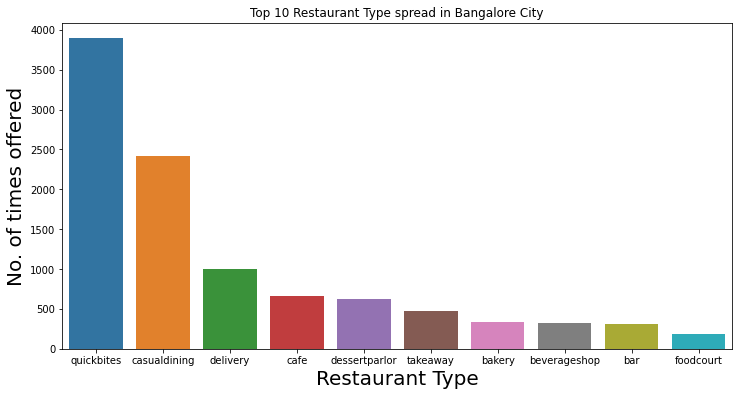

In [ ]:
data1=data[1:11]


plt.rcParams['figure.figsize'] = (12, 6)#Rating 
p=sns.barplot(x="Rest_type",y="Frequency",data=data1)
p.set_title("Top 10 Restaurant Type spread in Bangalore City")
p.set_xlabel("Restaurant Type", fontsize = 20)
p.set_ylabel("No. of times offered", fontsize = 20)

In [ ]:
#Data Prep for Q3
df_viz=df[['location','name','address','type']]
df_viz.drop_duplicates(inplace=True)

Question 8: How is type of service distributed among restaurants in Bangalore?

Insight 8: As expected Delivery and Dine out are the highest offered service types of restaurants. Delivery is the top service option as restaurant customers prefer convenience as a result it is prefferd restaurant service type. Delivery accounts for ~45% of the services offered by restaurants

In [ ]:
#Counting frequency using value count and storing result as dictionary
d=df_viz['type'].value_counts().to_dict()

#Converting the dictionary to data frame and resetting index so that I can save the index rest types as column
data=pd.DataFrame.from_dict(d, orient='index',columns=['Frequency']).reset_index()

#Renaming columns
data.rename(columns={'index': 'type'}, inplace=True)

In [ ]:
data

,type,Frequency
0,Delivery,7177
1,Dine-out,6390
2,Desserts,1290
3,Cafes,634
4,Drinks & nightlife,404
5,Buffet,327
6,Pubs and bars,327


Text(0, 0.5, 'Count of offered Service Type')

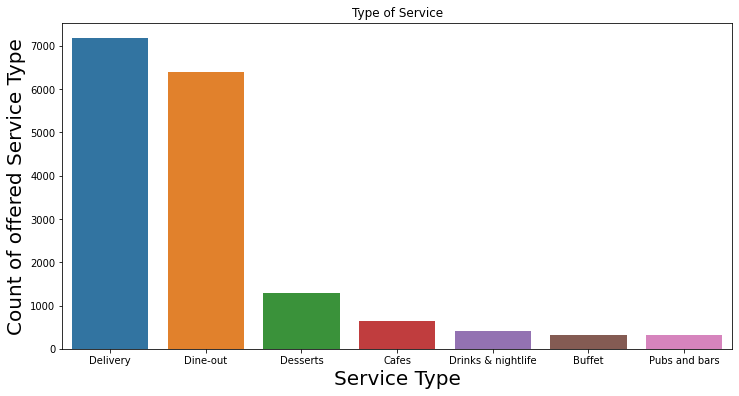

In [ ]:
data1=data

plt.rcParams['figure.figsize'] = (12, 6)#Rating 
p=sns.barplot(x="type",y="Frequency",data=data1)
p.set_title("Type of Service")
p.set_xlabel("Service Type", fontsize = 20)
p.set_ylabel("Count of offered Service Type", fontsize = 20)

In [ ]:
#Data Prep for Q9
df_viz=df[['location','name','address','book_table','rate']]
df_viz.drop_duplicates(inplace=True)

Question 9: Does Offering Table booking impact the Restaurant ratings

Insight 9: If the restaurant provides Table booking as an option they are more likely to get a higher rating as this feature adds more convinience to the users

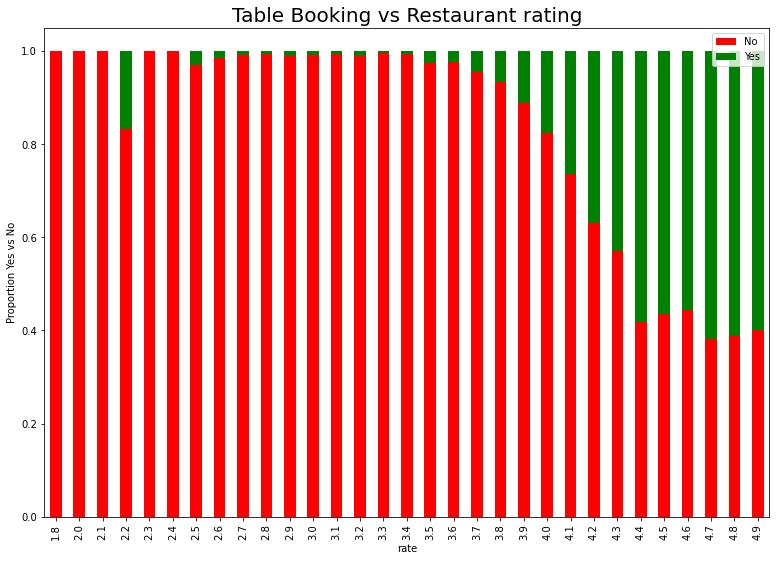

In [ ]:
plt.rcParams['figure.figsize'] = (13, 9)
Y = pd.crosstab(df_viz['rate'], df_viz['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','green'])
plt.title('Table Booking vs Restaurant rating', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.ylabel('Proportion Yes vs No')
plt.show()

In [ ]:
#Data Prep for Q10
df_viz=df[['location','name','address','cost','rate']]
df_viz.drop_duplicates(inplace=True)

Question 10: How much do restaurants charge for 2 people?

Insight 10: We see that there are some exceptional cases with very low costs for 2. Could be an issue in data collection. But most restaurants charge between 300 and 600 for 2 people 

Text(0, 0.5, 'Total Restaurants')

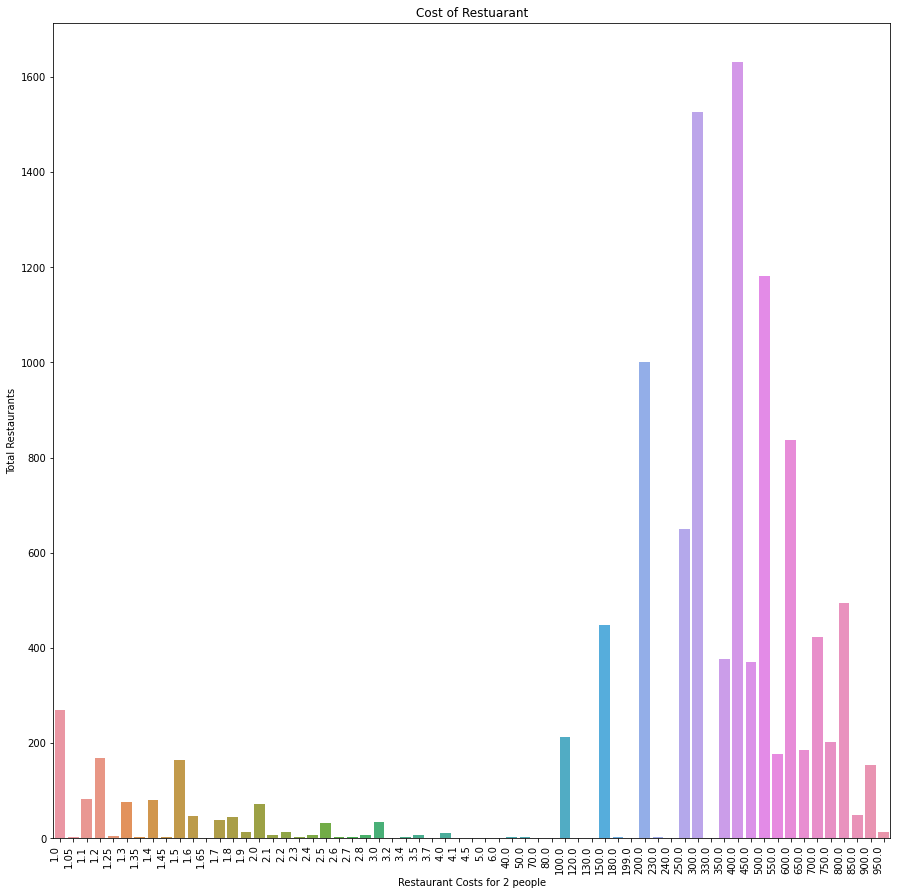

In [ ]:
sns.countplot(df_viz['cost'])
sns.countplot(df_viz['cost']).set_xticklabels(sns.countplot(df_viz['cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')
plt.xlabel('Restaurant Costs for 2 people')
plt.ylabel('Total Restaurants')

In [ ]:
#Data Prep for Q11
df_viz=df[['location','name','address']]
df_viz.drop_duplicates(inplace=True)

Question 11: Which restaurants have the most branches in Bangalore


Insight 11: Cafe Coffee Day and Domino's Pizza have the most branches. The top 5 restuarants are ones which people would go to on a regular basis. These restaurant brands could have low franchise costs


Text(0.5, 0, 'Number of outlets')

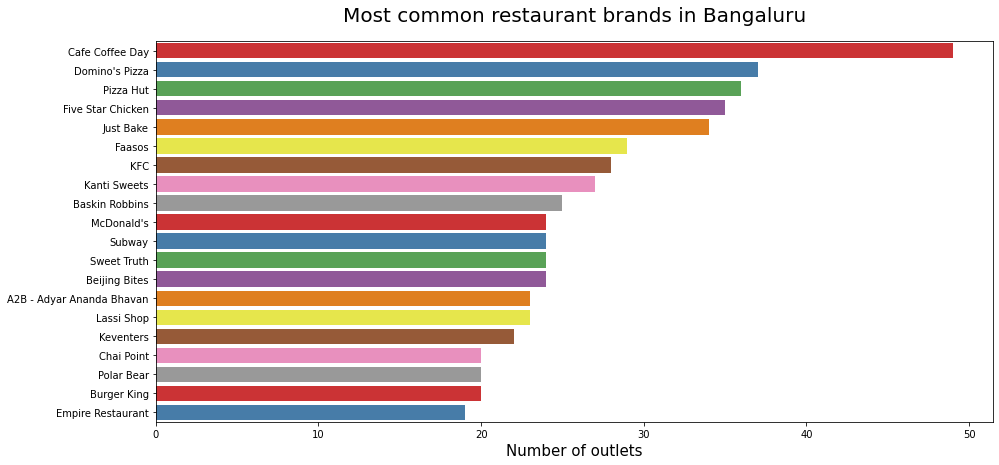

In [ ]:
plt.figure(figsize=(15,7))
chains=df_viz['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most common restaurant brands in Bangaluru",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

In [ ]:
#Data Prep for Q12
df_viz=df[['location','name','address','cuisines','cost']]
df_viz.drop_duplicates(inplace=True)

Question 12: Do top cuisines change depending on the cost for two?

Insight 12: Yes we see do see variation with the various budget ranges.

Low Budget(less than 300 for 2 people): Street Food and Bihari cuisine cost the least.

Medium Budget(less than 500 and more than 300 for 2 people): Mughlai, Northeastern, Pizza, North Indian cuisines cost in the medium range.

High Budget(greater than 500 for 2 people): Vegan restaurants and Niche middle east cuisines cost the most.


In [ ]:
#Parsiing Cuisines column and storing the cost for the restaurant offering the cuisine
par=df_viz['cuisines'].str.split(pat=',',expand=True)
par['cost']=df_viz['cost']
par.head()

,0,1,2,3,4,5,6,7,cost
0,North Indian,Mughlai,Chinese,None,None,None,None,None,800.0
1,Chinese,North Indian,Thai,None,None,None,None,None,800.0
2,Cafe,Mexican,Italian,None,None,None,None,None,800.0
3,South Indian,North Indian,None,None,None,None,None,None,300.0
4,North Indian,Rajasthani,None,None,None,None,None,None,600.0


In [ ]:
#Using the Parsed columns and appending the cost for the restaurant
#This is being done as for example Restaurant A offers cuisine A and cuisine B, we don't know the cost by cuisine.
#We are assuming same cost for both cuisine and will record cuisine A and B with the same cost.
#This is repeated with all restaurants, their cuisines and cost for 2 people
#This is stored row wise for each cuisine and cost combination
c=par[0] + ',' + par['cost'].astype(str)
c=c.append(par[1]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[2]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[3]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[4]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[5]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[6]+ ',' + par['cost'].astype(str), ignore_index = True)
c=c.append(par[7]+ ',' + par['cost'].astype(str), ignore_index = True)

#storing the row wise results as dataframe while splitting the combined cuisine and cost string which we concatenated in last step
from pandas.core.frame import DataFrame
d1=pd.DataFrame(columns=['cuisines','cost'])
d1[['cuisines','cost']]=c.str.split(',', expand=True)

#Removing spaces, special characters and converting to correct formats
import re
remove_special = lambda x: re.sub('[!,/*)\s@#%(&$_?.^]', '',str(x))
d1['cuisines']=d1['cuisines'].apply(remove_special).str.lower()
d1['cost']=d1['cost'].astype(float)
d1.head()

,cuisines,cost
0,northindian,800.0
1,chinese,800.0
2,cafe,800.0
3,southindian,300.0
4,northindian,600.0


In [ ]:
#Grouping by cuisines and calculating average cost
Z=d1.groupby('cuisines', as_index=False)['cost'].mean()

In [ ]:
#Creating function to draw word cloud- Size will be decided by the highest cost of cuisine.
#Higher average cost for the cuisine larger the size in word cloud
def cloud_word(budget):
    d = {w: f for w, f in
     zip(budget['cuisines'].tolist(),
         budget['cost'].tolist())}
    wordcloud = WordCloud(max_font_size=100,colormap="summer", height=300, width=400, random_state=42, background_color='#151515', prefer_horizontal=1)
    wordcloud.generate_from_frequencies(frequencies=d)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
#Categorizing the cuisines by the average costs
low_budget = Z[Z["cost"] <= 300].reset_index()
mid_budget = Z[(Z["cost"] <= 500) & (Z["cost"]>300)].reset_index()
high_budget = Z[Z["cost"]>500].reset_index()


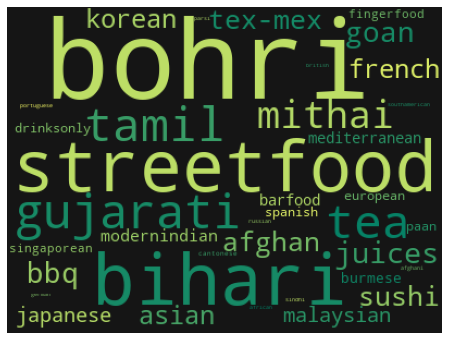

In [ ]:
# Low Avarage cost and cuisines
cloud_word(low_budget)

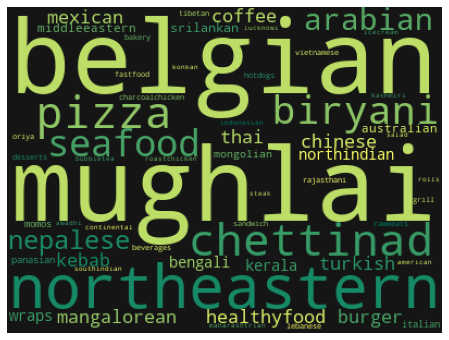

In [ ]:
# medium Avarage cost and cuisines
cloud_word(mid_budget)

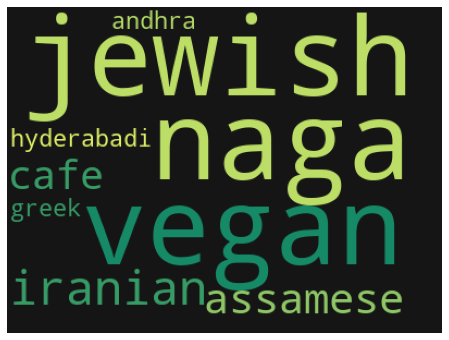

In [ ]:
# High Avarage cost and cuisines
cloud_word(high_budget)

In [ ]:
#Data Prep for Q13
df_viz=df[['location','name','address','cost','rate','votes']]
df_viz.drop_duplicates(inplace=True)

Question 13; How is correlation between rate column and votes cost.

Insight 13: Rate has +0.44 correlation with votes column. This could be an important predictor for a restaurant

Rate is very weekly negatively related to cost for two people column. This may not be very precise as the data contained extremely low values for few restaurants. That could have impacted the correlation between the two columns


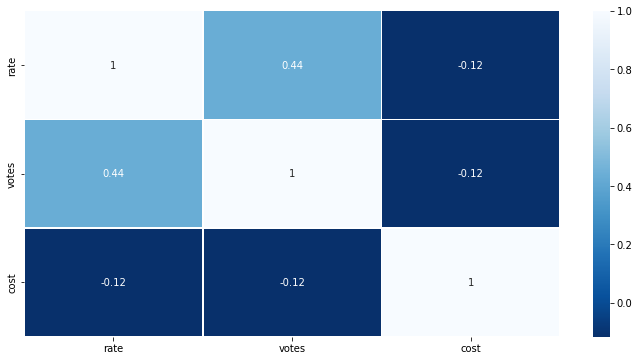

In [ ]:
data=df_viz[['rate','cost','votes']]
sns.heatmap(df.corr(), annot=True, linewidth=0.5, cmap="Blues_r") # heatmap

In [ ]:
#Checking correlation if we discard very low cost which may not be accurately recorded
column_1 = df_viz[df_viz["cost"]>100]["rate"]
column_2 = df_viz[df_viz["cost"]>100]["cost"]
correlation = column_1.corr(column_2)
# correlation of 0.2 between cost and rate

#Model Exploration and Model Selection

Based on above EDA insights we want to further breakdown the analysis goals as follows:


Goal 1: Understand what factors impact Rating of a restaurant

Approach: Correlation to see relation between variables and then explore variable importance using Linear regression weights or Regression tree models to understand variable importance

Goal 2: Identify and cluster restaurants based on common attributes

Approach: Clustering data to find similar restaurants or high rated groups

Goal 3: Predicting new restaurant rating depending on input parameters

Approach: Model building and creation of best fit model to predict new points

Goal 4: Building recommendation system to suggest restaurant based on customer preference.

Approach: Recommendation model- Content based filtering or collaborative learning


#Goal 1: Understand what factors impact Rating of a restaurant - Based on the EDA creating a final correlation chart

In [ ]:
#Data Prep for Correlation and future models
# As correlation function and sklearn models take numeric inputs only we need to convert categorical variables into numeric variables
# We have two approaches: 1) One Hot Encoding, 2) Encoding categories(each category as unique integer)

#Adv and DisAdv of Approach 1
#If we have x categories in a column we will be left with x additional columns. 
#As we have location like column with 30+ categories, we will have 30 additional column to One Hot Encode this column
#This will result in huge tables, high complexity, high number of 0s in rows, difficult to look through the data
#Might lead to overfitting using Tree Based algorithms

#Adv and DisAdv of Approach 2
#Not often used but we can add numerical encoding based on freqency of category or just adding a numerical value to identify the category
#This will result in just one column, so less complex, but with this approach higher numerical value may lead to bias
#That is it may show that higher the value higher the weight to be given which is not the case. So need to be careful
#Most tree-based models (SKLearn Random Forest, XGBoost, LightGBM) can handle number-labeled-columns very well.


##Model Approach
#We have implemented both approaches and tested the models. 
#We have evaluated approaches based on the Regression model(train and test data) R2 Scores, MAPE, RMSE scores.
#Models were also compared with the Naive Model
#we will be imputing few of the categorical variables(more than 30 categories) by frequency of occurance
#Categorical variables with binary categories will be label encoded to 1 or 0
#Categorical variables with  less than 30 categories and greater than 2 will be one hot encoded
# Numeric variables will be feature scaled. 

In [36]:
#Based on EDA selecting the below featuresdf_viz=df[['location','name','city','online_order','book_table','rest_type','cuisines','type','rate','cost','votes']]

In [316]:
# Adjust the column names and convert binary categories from Yes, No to True, False
df_viz.name = df_viz.name.apply(lambda x:x.title())
df_viz.location = df_viz.location.apply(lambda x:x.title())
df_viz.city = df_viz.city.apply(lambda x:x.title())
df_viz.online_order.replace(('Yes','No'),(True, False),inplace=True)
df_viz.book_table.replace(('Yes','No'),(True, False),inplace=True)
df_viz.head() # looking at the dataset after transformation


,location,name,city,online_order,book_table,rest_type,cuisines,type,rate,cost,votes,cuisine_freq
0,Banashankari,Jalsa,Banashankari,True,True,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,4.1,800.0,775,3
1,Banashankari,Spice Elephant,Banashankari,True,False,Casual Dining,"Chinese, North Indian, Thai",Buffet,4.1,800.0,787,3
2,Banashankari,San Churro Cafe,Banashankari,True,False,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,3.8,800.0,918,3
3,Banashankari,Addhuri Udupi Bhojana,Banashankari,False,False,Quick Bites,"South Indian, North Indian",Buffet,3.7,300.0,88,2
4,Basavanagudi,Grand Village,Banashankari,False,False,Casual Dining,"North Indian, Rajasthani",Buffet,3.8,600.0,166,2


In [317]:
#Feature creation: Number of Cuisines offered by restaurant  
df_viz['cuisine_freq']=list(map(lambda x: x.count(",")+1, df_viz['cuisines']))

In [318]:
# Imputing categorical columns with frequency of occurance when there are more than 30+ categories in column
zomato_en1 = df_viz['location'].value_counts().reset_index(name='location_freq').rename(columns={'index': 'location'})
df2=pd.merge(df_viz,zomato_en1,on=['location'], how='left' )


In [319]:
zomato_en1 = df_viz['name'].value_counts().reset_index(name='name_freq').rename(columns={'index': 'name'})
df2=pd.merge(df2,zomato_en1,on=['name'], how='left' )

In [320]:

zomato_en1 = df_viz['city'].value_counts().reset_index(name='city_freq').rename(columns={'index': 'city'})
df2=pd.merge(df2,zomato_en1,on=['city'], how='left' )
df2.head()

,location,name,city,online_order,book_table,rest_type,cuisines,type,rate,cost,votes,cuisine_freq,location_freq,name_freq,city_freq
0,Banashankari,Jalsa,Banashankari,True,True,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,4.1,800.0,775,3,744,11,727
1,Banashankari,Spice Elephant,Banashankari,True,False,Casual Dining,"Chinese, North Indian, Thai",Buffet,4.1,800.0,787,3,744,4,727
2,Banashankari,San Churro Cafe,Banashankari,True,False,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,3.8,800.0,918,3,744,11,727
3,Banashankari,Addhuri Udupi Bhojana,Banashankari,False,False,Quick Bites,"South Indian, North Indian",Buffet,3.7,300.0,88,2,744,2,727
4,Basavanagudi,Grand Village,Banashankari,False,False,Casual Dining,"North Indian, Rajasthani",Buffet,3.8,600.0,166,2,595,4,727


In [321]:
# One hot encoding Service Type offered feature as this column contains ~10 categories
df1=df2
y = pd.get_dummies(df1.type, prefix='type')
df2=pd.concat([df1,y], axis=1)

In [322]:
#cleaning rest_type column and one hot encoding column to get various restaurant type as features
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer(sparse_output=True)
df1=df2
df1['rest_new']=df1.rest_type.str.replace(" ","").str.lower()
df1.rest_new = (df1.rest_new).str.split(',')

df1 = df1.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df1.pop('rest_new')),
                index=df.index,
                columns=mlb.classes_))

df1.head()

,location,name,city,online_order,book_table,rest_type,cuisines,type,rate,cost,votes,cuisine_freq,location_freq,name_freq,city_freq,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,bakery,bar,beverageshop,bhojanalya,cafe,casualdining,club,confectionery,delivery,dessertparlor,dhaba,finedining,foodcourt,foodtruck,iranicafee,kiosk,lounge,meatshop,mess,microbrewery,pub,quickbites,sweetshop,takeaway
0,Banashankari,Jalsa,Banashankari,True,True,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,4.1,800.0,775,3,744,11,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Banashankari,Spice Elephant,Banashankari,True,False,Casual Dining,"Chinese, North Indian, Thai",Buffet,4.1,800.0,787,3,744,4,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Banashankari,San Churro Cafe,Banashankari,True,False,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,3.8,800.0,918,3,744,11,727,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Banashankari,Addhuri Udupi Bhojana,Banashankari,False,False,Quick Bites,"South Indian, North Indian",Buffet,3.7,300.0,88,2,744,2,727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,Grand Village,Banashankari,False,False,Casual Dining,"North Indian, Rajasthani",Buffet,3.8,600.0,166,2,595,4,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [323]:
#Encode the input Variables online order and book table features True and False to 1 and 0
def Encode(zomato):
    for column in zomato.columns[zomato.columns.isin(['online_order', 'book_table'])]:
        zomato[column] = zomato[column].factorize()[0]
    return zomato

zomato_en = Encode(df1.copy())
zomato_en.head() # looking at the dataset after transformation 

,location,name,city,online_order,book_table,rest_type,cuisines,type,rate,cost,votes,cuisine_freq,location_freq,name_freq,city_freq,type_Buffet,type_Cafes,type_Delivery,type_Desserts,type_Dine-out,type_Drinks & nightlife,type_Pubs and bars,bakery,bar,beverageshop,bhojanalya,cafe,casualdining,club,confectionery,delivery,dessertparlor,dhaba,finedining,foodcourt,foodtruck,iranicafee,kiosk,lounge,meatshop,mess,microbrewery,pub,quickbites,sweetshop,takeaway
0,Banashankari,Jalsa,Banashankari,0,0,Casual Dining,"North Indian, Mughlai, Chinese",Buffet,4.1,800.0,775,3,744,11,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Banashankari,Spice Elephant,Banashankari,0,1,Casual Dining,"Chinese, North Indian, Thai",Buffet,4.1,800.0,787,3,744,4,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Banashankari,San Churro Cafe,Banashankari,0,1,"Cafe, Casual Dining","Cafe, Mexican, Italian",Buffet,3.8,800.0,918,3,744,11,727,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Banashankari,Addhuri Udupi Bhojana,Banashankari,1,1,Quick Bites,"South Indian, North Indian",Buffet,3.7,300.0,88,2,744,2,727,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Basavanagudi,Grand Village,Banashankari,1,1,Casual Dining,"North Indian, Rajasthani",Buffet,3.8,600.0,166,2,595,4,727,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [324]:
#Dropping redundant columns. These columns have either been replaced by some imputation or encoding as separate columns
zomato_en.drop(['location','name','city','rest_type','cuisines','type'], axis =1, inplace=True)

In [325]:
#The complete clean dataset that we will be using for the model testing
zomato_en.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41237 entries, 0 to 41236
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype           
---  ------                   --------------  -----           
 0   online_order             41237 non-null  int64           
 1   book_table               41237 non-null  int64           
 2   rate                     41237 non-null  float64         
 3   cost                     41237 non-null  float64         
 4   votes                    41237 non-null  int64           
 5   cuisine_freq             41237 non-null  int64           
 6   location_freq            41237 non-null  int64           
 7   name_freq                41237 non-null  int64           
 8   city_freq                41237 non-null  int64           
 9   type_Buffet              41237 non-null  uint8           
 10  type_Cafes               41237 non-null  uint8           
 11  type_Delivery            41237 non-null  uint8           
 12  type

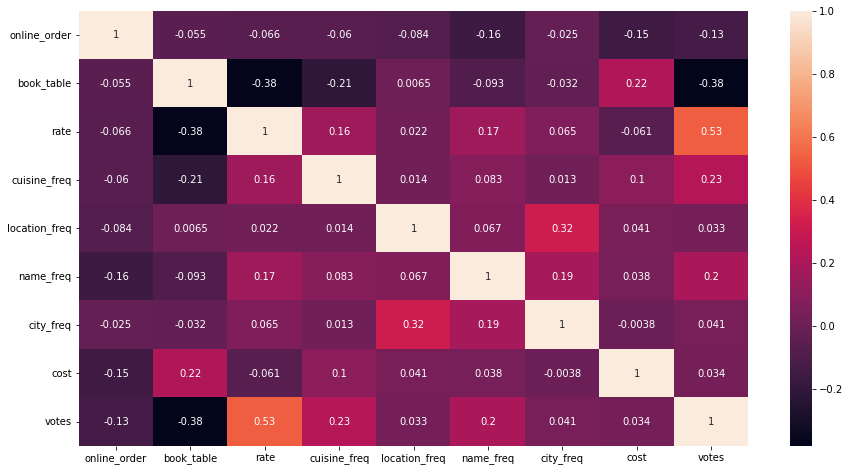

In [326]:
#Get Correlation between different variables
# We see that votes, book table and location seem to be important features impacting rating
corr = zomato_en[['online_order', 'book_table', 'rate', 'cuisine_freq', 'location_freq',
       'name_freq', 'city_freq','cost','votes']].corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
#zomato_en.columns
#Also we see that the features dont have a very high correlation amongst each other. 
#Correlation is not very high for any two feature columns meaning that the there won't be the multicollinearity issue

In [327]:
#Storing column names as a list for future use
ls=zomato_en.columns.tolist()
ls.remove('rate')

In [328]:
#Defining the independent variables(features) and dependent variables
x = zomato_en.iloc[:, zomato_en.columns!='rate'].values
y = zomato_en.iloc[:, zomato_en.columns=='rate'].values
y=y.reshape(len(y),1)


In [329]:
#Getting Test and Training Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=353)

In [330]:
#Feature scaling only non dummy variables(which are not 1 or 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:, 2:8] = sc.fit_transform(x_train[:, 2:8])
x_test[:, 2:8] = sc.transform(x_test[:, 2:8])


In [331]:
#Feature scaling rating y variable with another Standard scalar. 
# Implementation of model with or without scaling y has same impact. Its not necessary but done to ensure similar range among x and y
sc2 = StandardScaler()
#y_train=y_train.reshape(len(y_train),1)
#y_test=y_test.reshape(len(y_test),1)

y_train=sc2.fit_transform(y_train)
y_test=sc2.transform(y_test)

# Implementation of Selected Models

In [ ]:
## Try vectorizing different way not using ordinal or nominal for categories using numeric instead as dummy
#Train validate split, cross validation maybe try

# Implementation of Naive Model

In [332]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

##Naive Model- In naive model mean of y train is used as prediction and r2, RMSE and MAPE is calculated to get benchmark
y_pred=np.full((len(y_train),1), y_train.mean())
r2_score(y_train,y_pred).round(3)

0.0

In [333]:
mean_absolute_percentage_error(y_train,y_pred).round(3)

1.0

In [334]:
mean_squared_error(y_train,y_pred,squared=False).round(3)

1.0

# Implementation of Linear Regression

In [335]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [336]:
#Linear regression model
reg=LinearRegression()
reg.fit(x_train,y_train)

y_pred=reg.predict(x_train)
#Checking R2 Scores for train data. Poor Model
r2_score(y_train,y_pred).round(3)

0.334

In [337]:
mean_absolute_percentage_error(y_train,y_pred).round(3)

7.871

In [338]:
mean_squared_error(y_train,y_pred,squared=False).round(3)

0.816

In [339]:
y_pred=reg.predict(x_test)

#Checking R2 Scores for test data. Poor Model. But close to train R2 score showing not overfit
r2_score(y_test,y_pred).round(3)

0.323

In [340]:
mean_absolute_percentage_error(y_test,y_pred).round(3)

8.463

In [341]:
mean_squared_error(y_test,y_pred,squared=False).round(3)

0.825

In [342]:
#Checking variable importance from Linear regrssion
importance = reg.coef_
# summarize feature importance
for i in range(len(importance[0])):
	print('Feature: ' +str(ls[i])+', Score: %.3f' % (importance[0][i]))
# For this poor model, we see book_table, restaurant type dessertparlor,bhojanalya,cafe,dhaba,meatshop and fine dining are important

Feature: online_order, Score: -0.233
Feature: book_table, Score: -0.669
Feature: cost, Score: -0.055
Feature: votes, Score: 0.273
Feature: cuisine_freq, Score: 0.043
Feature: location_freq, Score: -0.032
Feature: name_freq, Score: 0.030
Feature: city_freq, Score: 0.073
Feature: type_Buffet, Score: -0.057
Feature: type_Cafes, Score: -0.011
Feature: type_Delivery, Score: -0.052
Feature: type_Desserts, Score: 0.104
Feature: type_Dine-out, Score: -0.038
Feature: type_Drinks & nightlife, Score: 0.018
Feature: type_Pubs and bars, Score: 0.035
Feature: bakery, Score: -0.017
Feature: bar, Score: 0.135
Feature: beverageshop, Score: 0.114
Feature: bhojanalya, Score: -0.680
Feature: cafe, Score: 0.384
Feature: casualdining, Score: 0.104
Feature: club, Score: 0.083
Feature: confectionery, Score: -0.199
Feature: delivery, Score: -0.039
Feature: dessertparlor, Score: 0.525
Feature: dhaba, Score: -0.629
Feature: finedining, Score: 0.711
Feature: foodcourt, Score: -0.220
Feature: foodtruck, Score: -0.

# Implementation of Decision Tree Model

In [343]:
#Prepairng a Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)
DTree.fit(x_train,y_train)

#Checking R2 Scores for train data. Very good Model
y_pred=DTree.predict(x_train)

r2_score(y_train,y_pred).round(3)

0.937

In [344]:
mean_absolute_percentage_error(y_train,y_pred).round(3)

2.854

In [345]:
mean_squared_error(y_train,y_pred,squared=False).round(3)

0.25

In [346]:
#Checking R2 Scores for test data. Good Model. R2 Scores for test and train are close meaning no overfitting.
y_pred=DTree.predict(x_test)
r2_score(y_test,y_pred).round(3)

0.806

In [347]:
mean_absolute_percentage_error(y_test,y_pred).round(3)

5.609

In [348]:
mean_squared_error(y_test,y_pred,squared=False).round(3)

0.442

In [349]:
#Checking variable importance from Linear regrssion amount
importance = DTree.feature_importances_

In [350]:
# summarize feature importance
for i in range(len(importance)):
	print('Feature: ' +str(ls[i])+', Score: %.3f' % (importance[i]))

Feature: online_order, Score: 0.015
Feature: book_table, Score: 0.020
Feature: cost, Score: 0.072
Feature: votes, Score: 0.562
Feature: cuisine_freq, Score: 0.038
Feature: location_freq, Score: 0.084
Feature: name_freq, Score: 0.093
Feature: city_freq, Score: 0.032
Feature: type_Buffet, Score: 0.001
Feature: type_Cafes, Score: 0.000
Feature: type_Delivery, Score: 0.000
Feature: type_Desserts, Score: 0.001
Feature: type_Dine-out, Score: 0.000
Feature: type_Drinks & nightlife, Score: 0.000
Feature: type_Pubs and bars, Score: 0.000
Feature: bakery, Score: 0.004
Feature: bar, Score: 0.003
Feature: beverageshop, Score: 0.003
Feature: bhojanalya, Score: 0.000
Feature: cafe, Score: 0.016
Feature: casualdining, Score: 0.008
Feature: club, Score: 0.000
Feature: confectionery, Score: 0.000
Feature: delivery, Score: 0.005
Feature: dessertparlor, Score: 0.019
Feature: dhaba, Score: 0.000
Feature: finedining, Score: 0.001
Feature: foodcourt, Score: 0.003
Feature: foodtruck, Score: 0.000
Feature: ir

<BarContainer object of 39 artists>

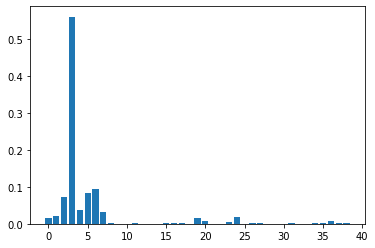

In [351]:
#Plotting features
pyplot.bar([x for x in range(len(importance))], importance)
#votes is the most important metric for rating prediction. Customers decide ratings based on the cost for 2

# Implementation of Extra Tree Regression

In [352]:
#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ETree=ExtraTreesRegressor(n_estimators = 100)
ETree.fit(x_train,y_train)

#Checking R2 Scores for train data. Great Model
y_pred=ETree.predict(x_train)
r2_score(y_train,y_pred).round(3)

1.0

In [353]:
mean_absolute_percentage_error(y_train,y_pred).round(3)

0.026

In [354]:
mean_squared_error(y_train,y_pred,squared=False).round(3)

0.015

In [355]:
#Checking R2 Scores for test data. Very good Model. R2 scores for test and train dataset is close so no overfitting done
y_pred=ETree.predict(x_test)
r2_score(y_test,y_pred).round(3)

0.941

In [356]:
mean_absolute_percentage_error(y_test,y_pred).round(3)

2.249

In [357]:
mean_squared_error(y_test,y_pred,squared=False).round(3)

0.243

In [358]:
# get feature importance using Extra tree regression
importance = ETree.feature_importances_

In [359]:
# summarize feature importance
for i in range(len(importance)):
	print('Feature: ' +str(ls[i])+', Score: %.5f' % (importance[i]))
 #Features like votes, availability of booking table option, restaurant brand name(more franchise more popularity and higher rating)
 #location and cuisine offered are important features that drive ratings

Feature: online_order, Score: 0.01979
Feature: book_table, Score: 0.17604
Feature: cost, Score: 0.09160
Feature: votes, Score: 0.30079
Feature: cuisine_freq, Score: 0.06484
Feature: location_freq, Score: 0.08394
Feature: name_freq, Score: 0.09966
Feature: city_freq, Score: 0.03351
Feature: type_Buffet, Score: 0.00172
Feature: type_Cafes, Score: 0.00025
Feature: type_Delivery, Score: 0.00193
Feature: type_Desserts, Score: 0.00284
Feature: type_Dine-out, Score: 0.00177
Feature: type_Drinks & nightlife, Score: 0.00010
Feature: type_Pubs and bars, Score: 0.00004
Feature: bakery, Score: 0.00553
Feature: bar, Score: 0.00569
Feature: beverageshop, Score: 0.00489
Feature: bhojanalya, Score: 0.00000
Feature: cafe, Score: 0.02267
Feature: casualdining, Score: 0.01413
Feature: club, Score: 0.00010
Feature: confectionery, Score: 0.00005
Feature: delivery, Score: 0.00646
Feature: dessertparlor, Score: 0.02282
Feature: dhaba, Score: 0.00014
Feature: finedining, Score: 0.00170
Feature: foodcourt, Sco

<BarContainer object of 39 artists>

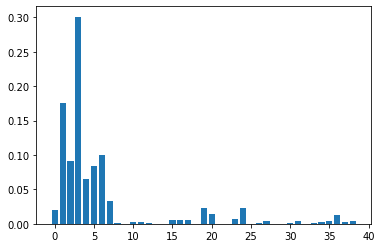

In [360]:
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)


Extra Tree Regression is the best model among the linear tree and Decision tree model. It has the highest train and test R2 Score and low MAPE and RMSE scores.

We also see that now new restaurant ratings can be predicted using the Extra tree regression. 

This enables us to acheive Goal 3: Predicting new restaurant rating depending on input parameters. We just have to transform new data like the x_test and use predict for the ETree model to get ratings

# Goal 2: Identify and cluster restaurants based on common attributes

# Implementation of KMeans Clustering

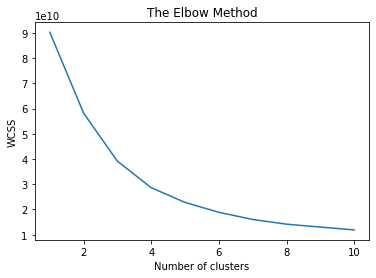

In [131]:
#To find optimum number of clusters we implement Elbow curve 
# Find the point at which the Within-Cluster-Sum-of-Squares forms a elbow with k cluster
# All features are used to find clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
# Here K =3 or 4 can be chosen due to the smoothness in curve

In [132]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x)
#this can now be used to predict what rating cluster a new restaurant may fall under. 
# We can also use the restaurants under these clusters to understand attributes and common trends live average ratings etc

In [ ]:
# Here we will be predicting ratings for the New restaurants that did not have ratings in the initial dataset

# Goal 4: Building recommendation system to suggest restaurant based on customer preference.

https://colab.research.google.com/drive/1OK2sHx0_jYjfoK0LnXDuzw8DOgY-ltMc?usp=sharing